In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/blogs_categories.txt',on_bad_lines='skip',names=['Index','Data','Labels'])

In [3]:
df['Index'] = range(len(df['Data']))
df

,Index,Data,Labels
0,0,Data,Labels
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df['Data'][1]

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\r\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\r\nFrom: mathew <mathew@mantis.co.uk>\r\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\r\nSubject: Alt.Atheism FAQ: Atheist Resources\r\nSummary: Books, addresses, music -- anything related to atheism\r\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\r\nMessage-ID: <19930329115719@mantis.co.uk>\r\nDate: Mon, 29 Mar 1993 11:57:19 GMT\r\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\r\nFollowup-To: alt.atheism\r\nDistribution: world\r\nOrganization: Mantis Consultants, Cambridge. UK.\r\nApproved: news-answers-request@mit.edu\r\nSupersedes: <19930301143317@mantis.co.uk>\r\nLines: 290\r\n\r\nArchive-name: atheism/resources\r\nAlt-ath

In [5]:
import nltk
nltk.download('punkt')
import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
stem = PorterStemmer()

In [94]:
from nltk.corpus import stopwords
words = set(nltk.corpus.words.words())
stop_words = stopwords.words('english')


In [85]:
def clean_words(data):
  doc = nlp(data)
  clean_text = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_digit ]
  clean_text = [stem.stem(token) for token in clean_text]
  clean_text = " ".join(clean_text)
  clean_text =  " ".join(w for w in nltk.wordpunct_tokenize(clean_text)
                    if w.lower() in words
                    and w.lower() not in stop_words
                    and len(w.lower()) > 7)

  return clean_text

In [86]:
print(len(clean_words(df['Data'][1])))
print(clean_words(df['Data'][1]))

566
cantaloupe cantaloupe religion paraphernalia religion postpaid contradict handbook contradict contradict rationalist humanist international international doomsday blueprint doomsday philosoph approach religion craftsman descript religion pregnant handmaid congress assassin fundamentalist retroact difficult somewhat philosoph outstand appendix argument particular paperback unbelief unbelief statement suppress religion religion clarendon paperback construct argument argument somewhat appendix somewhat argument philosoph argument formalist congress fundamentalist


In [97]:
#df['New_Data'] = df['Data'].apply(clean_words)

In [96]:
df

,Index,Data,Labels,New_Data
0,0,Data,Labels,
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,cantaloupe cantaloupe religion paraphernalia r...
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,cantaloupe cantaloupe document viewpoint compa...
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,alt.atheism,cantaloupe argument argument overwhelm manuscr...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,cantaloupe politics constitution cantaloupe po...
...,...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,cantaloupe religion religion cantaloupe magnes...
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,cantaloupe religion cantaloupe magnesium relig...
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,cantaloupe religion politics religion politics...
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,cantaloupe religion religion cantaloupe magnes...


In [112]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df['Labels'] = lab_enc.fit_transform(df['Labels'])

In [113]:
df

,Index,Data,Labels,New_Data
0,0,Data,0,
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1,cantaloupe cantaloupe religion paraphernalia r...
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe cantaloupe document viewpoint compa...
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,1,cantaloupe argument argument overwhelm manuscr...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe politics constitution cantaloupe po...
...,...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion religion cantaloupe magnes...
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion cantaloupe magnesium relig...
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion politics religion politics...
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion religion cantaloupe magnes...


Naive Bayes

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
pipeline = Pipeline([('countvect',CountVectorizer(analyzer=clean_words)),('tfidf',TfidfTransformer()),('multinb',MultinomialNB())])

In [101]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(df['New_Data'],df['Labels'],random_state=100,train_size=0.75)

In [115]:
x_train

8638                                  cantaloupe recommend
19646    religion cantaloupe destroyer background state...
19494                religion cantaloupe religion religion
10953    cantaloupe magnesium postseason straight strai...
91       cantaloupe religion cantaloupe religion contra...
                               ...                        
16304     cantaloupe politics threaten maintain regardless
79       cantaloupe cantaloupe descript agnostic remarq...
12119    cantaloupe electronics electron cantaloupe que...
14147                                  cantaloupe question
5640                                  cantaloupe magnesium
Name: New_Data, Length: 14998, dtype: object

In [116]:
y_train

8638      9
19646    20
19494    20
10953    11
91        1
         ..
16304    17
79        1
12119    13
14147    15
5640      6
Name: Labels, Length: 14998, dtype: int64

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14998,)
(5000,)
(14998,)
(5000,)


In [118]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('countvect',
                 CountVectorizer(analyzer=<function clean_words at 0x7b6003c90f70>)),
                ('tfidf', TfidfTransformer()), ('multinb', MultinomialNB())])

In [119]:
ypred = pipeline.predict(x_test)

In [120]:
accuracy_score(y_test,ypred)

0.1756

In [122]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.15      0.07      0.10       258
           2       0.10      0.08      0.09       252
           3       0.12      0.12      0.12       282
           4       0.11      0.12      0.12       263
           5       0.06      0.06      0.06       229
           6       0.09      0.38      0.15       227
           7       0.14      0.14      0.14       255
           8       0.00      0.00      0.00       238
           9       0.19      0.14      0.16       258
          10       0.15      0.08      0.10       251
          11       0.16      0.13      0.14       243
          12       0.17      0.08      0.11       275
          13       0.34      0.66      0.45       242
          14       0.13      0.13      0.13       243
          15       0.12      0.11      0.12       245
          16       0.32      0.30      0.31       237
          17       0.18      0.26      0.21       234
          18       0.20    

<Axes: >

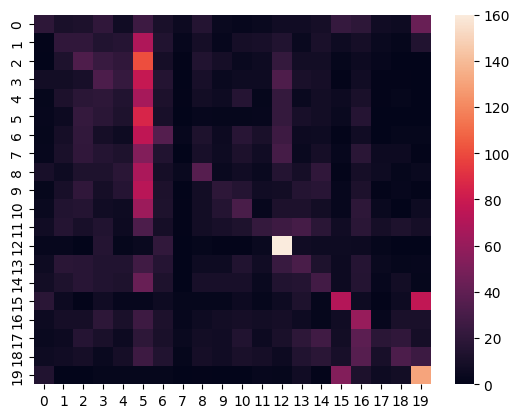

In [124]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,ypred))

In [125]:
#Text_Mining

In [126]:
df

,Index,Data,Labels,New_Data
0,0,Data,0,
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1,cantaloupe cantaloupe religion paraphernalia r...
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe cantaloupe document viewpoint compa...
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,1,cantaloupe argument argument overwhelm manuscr...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe politics constitution cantaloupe po...
...,...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion religion cantaloupe magnes...
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion cantaloupe magnesium relig...
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion politics religion politics...
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion religion cantaloupe magnes...


In [127]:
df['total_words'] = df['New_Data'].str.split().apply(len)

In [128]:
df

,Index,Data,Labels,New_Data,total_words
0,0,Data,0,,0
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1,cantaloupe cantaloupe religion paraphernalia r...,57
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe cantaloupe document viewpoint compa...,164
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,1,cantaloupe argument argument overwhelm manuscr...,11
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe politics constitution cantaloupe po...,14
...,...,...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion religion cantaloupe magnes...,9
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion cantaloupe magnesium relig...,12
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion politics religion politics...,15
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion religion cantaloupe magnes...,14


In [129]:
df.drop(0,axis=0,inplace =True)
df

,Index,Data,Labels,New_Data,total_words
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1,cantaloupe cantaloupe religion paraphernalia r...,57
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe cantaloupe document viewpoint compa...,164
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,1,cantaloupe argument argument overwhelm manuscr...,11
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe politics constitution cantaloupe po...,14
5,5,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe scouting cantaloupe research approa...,7
...,...,...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion religion cantaloupe magnes...,9
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion cantaloupe magnesium relig...,12
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion politics religion politics...,15
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion religion cantaloupe magnes...,14


In [134]:

affin = pd.read_csv('Afinn.csv',encoding='latin-1')

In [135]:
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [136]:
aff_dict = affin.set_index('word')['value'].to_dict()

In [137]:
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [140]:
def sentiment_count(text:str=None):
  sent_count = 0
  if text:
    doc = nlp(text)
    for token in doc.ents:
      sent_count += aff_dict.get(token.lemma_,0)
    return sent_count

In [141]:
df['Sentiment_count'] = df['New_Data'].apply(sentiment_count)

In [142]:
df

,Index,Data,Labels,New_Data,total_words,Sentiment_count
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1,cantaloupe cantaloupe religion paraphernalia r...,57,0
2,2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe cantaloupe document viewpoint compa...,164,0
3,3,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,1,cantaloupe argument argument overwhelm manuscr...,11,0
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe politics constitution cantaloupe po...,14,0
5,5,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1,cantaloupe scouting cantaloupe research approa...,7,0
...,...,...,...,...,...,...
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion religion cantaloupe magnes...,9,0
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,20,cantaloupe religion cantaloupe magnesium relig...,12,0
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion politics religion politics...,15,0
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,20,cantaloupe religion religion cantaloupe magnes...,14,0
